## Monte Carlo Sample mean

$N(0,1)$에서 $[2,3]$ 부분만 샘플해서 그 평균값을 return 하는 코드 

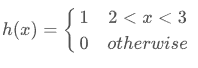





In [49]:
import numpy as np

num_samples = 30000
range_ = (2, 3)

samples = np.random.normal(0, 1, num_samples)

# 쓸만한 sample index를 가져오자.
idxl = samples >= range_[0]
idxr = samples <= range_[1]
idx = idxl & idxr

samples_in_range = samples[idx]
print("{}개 중 쓸 수 있는 sample 갯수: {}개".format(num_samples, len(samples_in_range)))

result = np.sum(samples_in_range)/len(samples_in_range)
print("결과 : {}".format(result))

30000개 중 쓸 수 있는 sample 갯수: 673개
결과 : 2.3137090272344354


## 수식을 활용한 구현 

$N(0,1)$에서 $[2,3]$ 부분만 추출해서 그 평균값을 return 하는 코드 

샘플과 수식적 계산이 매우 유사함을 보여준다.

$$ \int^3_2 x{\theta(x)  \over \int^3_2 \theta(y)dy} dx $$

In [95]:
from scipy.integrate import romberg


def integrand_norm(x, s):
    return np.exp(-0.5*(x/s)**2)/(np.sqrt(2*np.pi)*s)

def integrand_normx(x, s):
    return x*np.exp(-0.5*(x/s)**2)/(np.sqrt(2*np.pi)*s)

den = romberg(integrand_norm, range_[0], range_[1], args=(1.0, ))
num = romberg(integrand_normx, range_[0], range_[1], args=(1.0, ))
print(" 확률 :  ",num/den)

 확률 :   2.3158213265311987


## Importance Sampling


수식을 아래와 같이 변경해준다.

$$\int^3_2 x{\theta(x) \over \int^3_2 \theta(y)dy } dx  =  \int^3_2 x{\theta(x) \over \int^3_2 \theta(y)dy h(x) }*h(x) dx $$


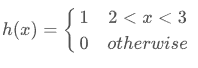

h(t)는 $U[2,3] $의 pdf이며,  $$importance~~ratio~~: ~ w = {\theta(x) \over \int^3_2 \theta(y)dy h(x)}  $$


버리는 샘플이 하나도 없이 진행한다. 


2~3까지 샘플을 뽑고 그에 대해 importance ratio를 나누어 주어 결과 획득

In [86]:
samples = np.random.uniform(range_[0], range_[1], num_samples)

print("샘플링 : ",samples)

print("정규분포 2~3 면적 : ",den)

importance_ratio = integrand_norm(samples, 1)/den

print("결과 (샘플평균) : {}".format(np.sum(samples*importance_ratio)/num_samples))



샘플링 :  [2.10659485 2.7282952  2.47742982 ... 2.03455121 2.53733418 2.13020385]
정규분포 2~3 면적 :  0.021400233916529763
결과 (샘플평균) : 2.320734243301575


Sample 평균은 참값과 거의 같다. 

하지만, $$ samples* \omega $$의 분산은 크게 나온다

In [94]:
print("Sample의 분산 :", np.var(samples*importance_ratio))

Sample의 분산 : 1.6398818085280065
